In [3]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


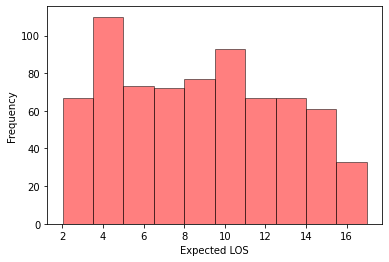

In [2]:
#16. Plot a graph to show the distribution of Expected Length of Stay
discharge = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Discharges")
df_LOS = discharge["ExpectedLOS"]
(df_LOS).head()
plt.hist(df_LOS,bins=10,color='red',alpha=0.5,edgecolor='black')
plt.xlabel('Expected LOS')
plt.ylabel('Frequency')
plt.show()

In [3]:
#18.Add column 'Age' in Patient table.
import pandas as pd
from datetime import datetime,date

patient = pd.read_excel("HospitalDatabase .xlsx",sheet_name="Patients")
df_dob = patient["DateOfBirth"]

#Converting birth date to age
def age(DateOfBirth):
    patient["DateOfBirth"] = pd.to_datetime(df_dob)
    today = date.today()
    return today.year - DateOfBirth.year - ((today.month,today.day) < (DateOfBirth.month,DateOfBirth.day))
    
patient['Age'] = df_dob.apply(age)
display(patient)
    

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,62
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,36
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,53
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,36
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,52
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,39
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,59


In [4]:
#19.Create a dataframe with date and time as columns,where the values are the discharge time from ReAdmission resistry sheet.

readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_dischargetime = readmregistry["DischargeDate"]

#Creating a dataFrame
df = pd.DataFrame(df_dischargetime)
#Splitting the date part 
df["Date"] = [readmregistry.date() for readmregistry in df["DischargeDate"]]
#splitting the time part
df["Time"] = [readmregistry.time() for readmregistry in df["DischargeDate"]]
#Display the dataframe
display(df)

,DischargeDate,Date,Time
0,2018-01-04 19:59:31.391,2018-01-04,19:59:31.391000
1,2018-01-04 21:28:51.898,2018-01-04,21:28:51.898000
2,2018-01-04 22:28:23.672,2018-01-04,22:28:23.672000
3,2018-01-05 05:47:04.933,2018-01-05,05:47:04.933000
4,2018-01-05 14:18:30.029,2018-01-05,14:18:30.029000
...,...,...,...
715,2018-03-07 21:22:10.061,2018-03-07,21:22:10.061000
716,2018-03-08 02:43:18.749,2018-03-08,02:43:18.749000
717,2018-03-08 09:27:18.377,2018-03-08,09:27:18.377000
718,2018-03-10 06:06:12.068,2018-03-10,06:06:12.068000


In [5]:
#20. Count of number of patients admitted based on Primary Diagnosis and Service provided
readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_readm = readmregistry[["PrimaryDiagnosis","Service","PatientID"]]
df_sort = df_readm.groupby(["PrimaryDiagnosis","Service"]).count()
(df_sort)

PatientID
PrimaryDiagnosis   Service                    
AMI                Cardiology               40
                   Hospitalist               1
                   ICU                       5
                   Neurology                 2
Afib               Cardiology               10
                   ICU                       1
Broken Leg         Cardiology                3
                   General Medicine          3
                   Hospitalist               3
Diabetes           General Medicine         38
                   Hospitalist              26
Fever              General Medicine         13
                   Hospitalist               3
                   ICU                       3
Flu                Cardiology                2
                   General Medicine         54
                   Hospitalist              19
                   ICU                       3
                   Neurology                 2
Heart Failure      Cardiology               39
                   ICU                      33
                   Neurology                 6
Hip Fracture       Orthopeadics             23
Hypertension       General Medicine         35
                   Hospitalist               6
                   ICU                       4
                   Neurology                 5
Kidney Failure     Cardiology                1
                   General Medicine         12
                   Hospitalist               6
                   ICU                       1
Knee Replacement   Hospitalist               1
                   Orthopeadics             22
Laceration         General Medicine         21
                   Hospitalist               7
                   ICU                       1
Migraine           Neurology                12
Pain               Neurology                 7
Pneumonia          General Medicine         67
                   Hospitalist              28
                   ICU                      77
                   Neurology                 5
Spinal Cord Injury ICU                       2
Stroke             General Medicine         20
                   Hospitalist               1
                   ICU                      21
                   Neurology                26

In [1]:
#37. Write a function to print all the upper case letter of a given sentence.

def print_uppercase(sentence): 
    sent = list(filter(lambda c:c.isupper(),sentence))
    print("The uppercase characters in the string are : " + str(sent))
s = input("Please Enter a String:")
print("The entered string is : " + str(s))
print_uppercase(s)

Please Enter a String:What is Your Name?
The entered string is : What is Your Name?
The uppercase characters in the string are : ['W', 'Y', 'N']


In [4]:
#38. Number of patients on "Transfer" based on Primary Diagnosis.
readmregistry = pd.read_excel("HospitalDatabase .xlsx",sheet_name="ReAdmissionRegistry")
df_count = readmregistry.groupby("PrimaryDiagnosis")["DischargeDisposition"].apply(lambda x: (x=='Transfer').count()).reset_index(name='Patientcount')
display(df_count)

,PrimaryDiagnosis,Patientcount
0,AMI,48
1,Afib,11
2,Broken Leg,9
3,Diabetes,64
4,Fever,19
5,Flu,80
6,Heart Failure,78
7,Hip Fracture,23
8,Hypertension,50
9,Kidney Failure,20


In [5]:
# 56. Count of Cancelled status.
df_ambulatory = pd.read_excel("HospitalDatabase .xlsx",sheet_name="AmbulatoryVisits")
df_amb = df_ambulatory["VisitStatus"]
print((df_amb == 'Canceled').sum())

60


In [6]:
#76.Reverse the string without using inbuilt functions.

#function to find reverse of string
def getreverse(string):
    reverse = ''
    for i in range(len(string), 0, -1):
        reverse += string[i-1]
    return reverse

#get the input
string = input('Enter the string: ')

#calling function
reverse = getreverse(string)
print('The reverse string is',reverse)

Enter the string: pattern
The reverse string is nrettap
